# REAL ESTATE PRICE PREDICTION

#### Datasets from kaggle

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline 

In [3]:
os.chdir('C:\\Users\\wogun\\Desktop\\Projects')

In [4]:
df = pd.read_csv('Real estate.csv')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [5]:
df.shape

(414, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
No                                        414 non-null int64
X1 transaction date                       414 non-null float64
X2 house age                              414 non-null float64
X3 distance to the nearest MRT station    414 non-null float64
X4 number of convenience stores           414 non-null int64
X5 latitude                               414 non-null float64
X6 longitude                              414 non-null float64
Y house price of unit area                414 non-null float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [7]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [8]:
df_new = df.rename(columns={'X1 transaction date': 'Transaction date', 'X2 house age': 'House Age',
                'X3 distance to the nearest MRT station':'MRT Station Distance', 
                'X4 number of convenience stores': 'No of Stores',
                'X5 latitude': 'Latitude', 'X6 longitude':'Longitude', 'Y house price of unit area': 'house Price'}, inplace=True)

In [9]:
df.head()

,No,Transaction date,House Age,MRT Station Distance,No of Stores,Latitude,Longitude,house Price
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [10]:
df.describe()

,No,Transaction date,House Age,MRT Station Distance,No of Stores,Latitude,Longitude,house Price
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


### EDA (Exploratory Data Analysis)

 Let's visualize some of the feature and labels

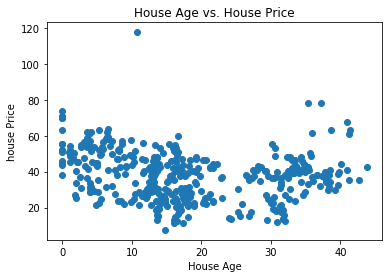

In [11]:
plt.scatter(df['House Age'], df['house Price'])
plt.xlabel('House Age')
plt.ylabel('house Price')
plt.title('House Age vs. House Price')
plt.show()

In [12]:
# Check Correlation of the data
df.corr()

,No,Transaction date,House Age,MRT Station Distance,No of Stores,Latitude,Longitude,house Price
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
Transaction date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
House Age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
MRT Station Distance,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
No of Stores,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
Latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
Longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
house Price,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


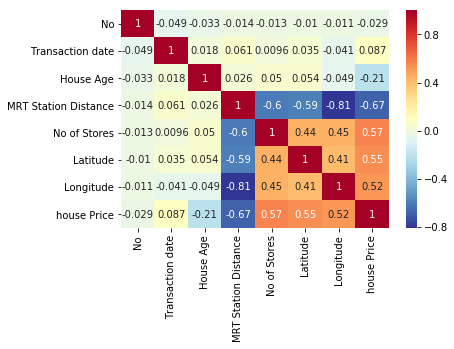

In [12]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlBu_r')

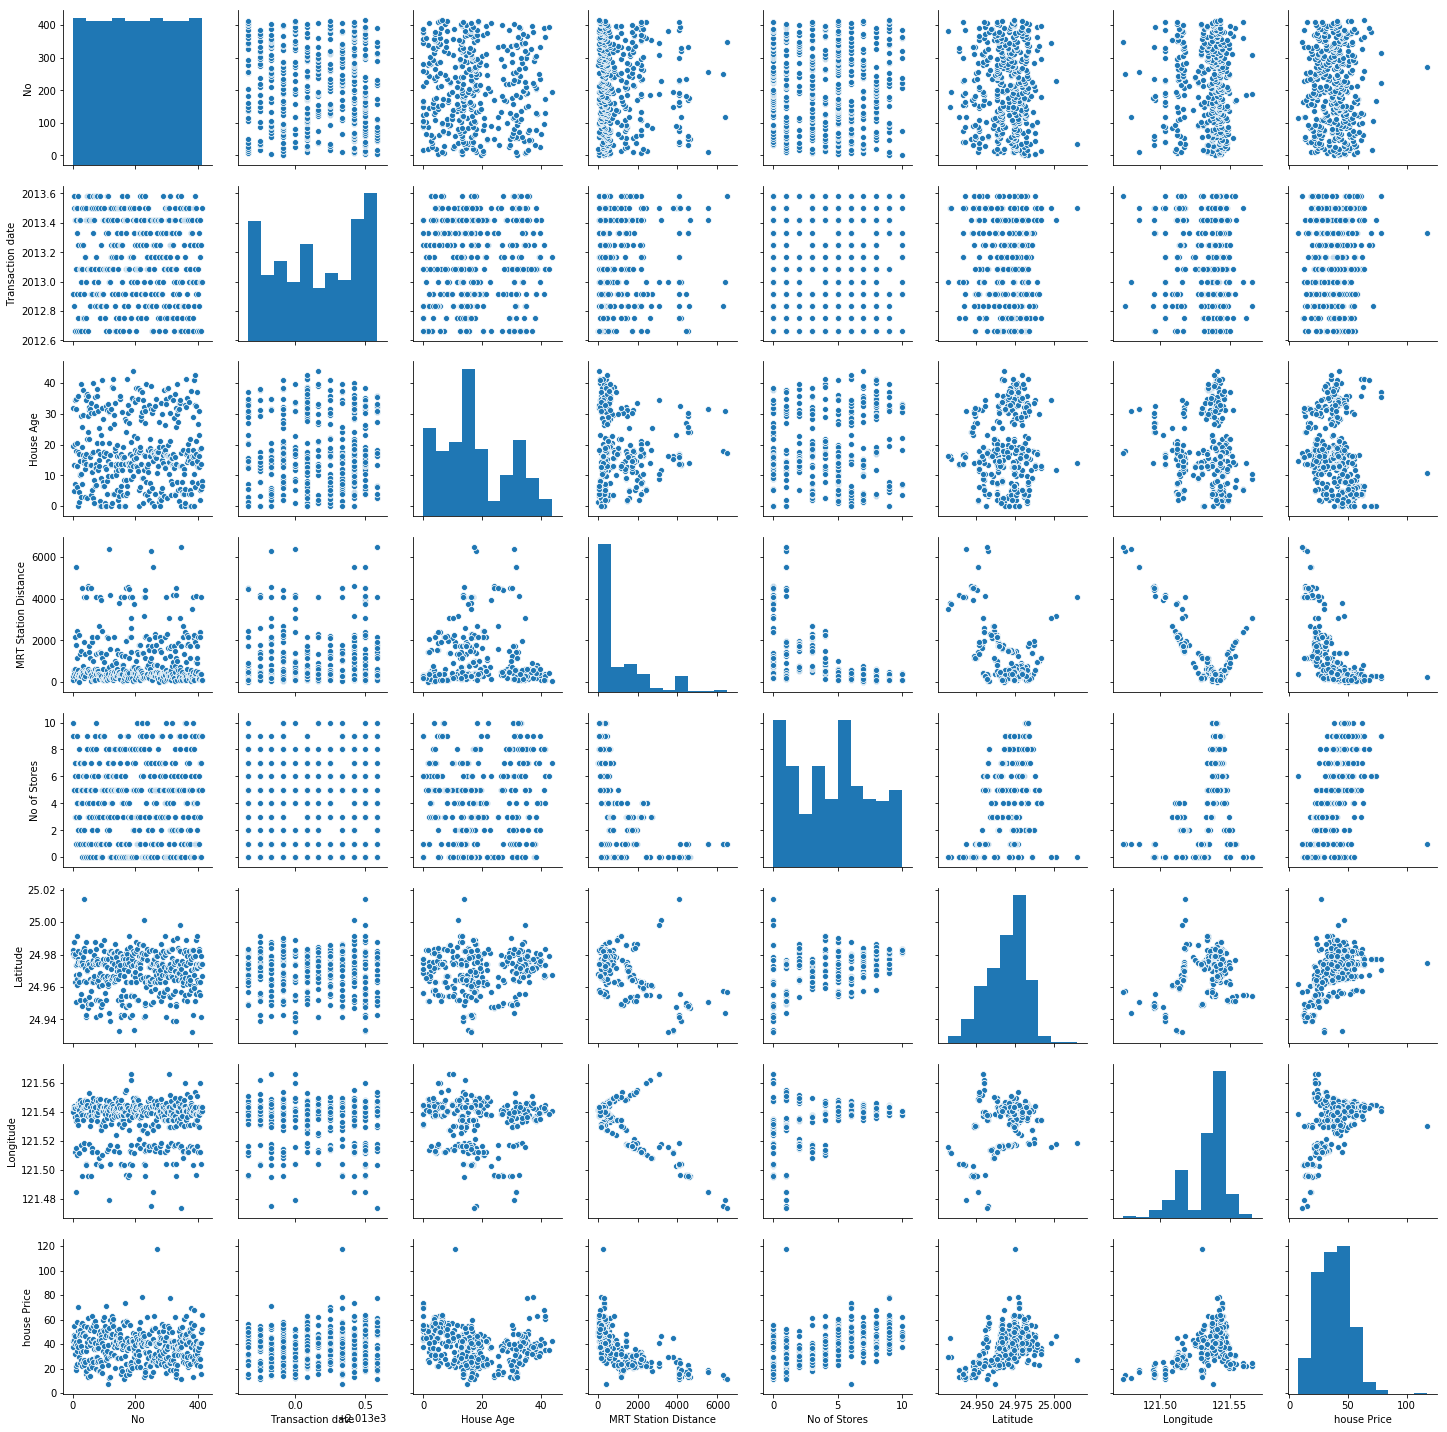

In [13]:
sns.pairplot(df)

### Features and Labels 

In [14]:
X = df.drop('house Price', axis=1)
y = df['house Price']

print(f'The data has {X.shape[0]} rows')
print(f'The data has {X.shape[1]} columns')

The data has 414 rows
The data has 7 columns


### Preprocessing

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state = 101)

### Linear Regression`

In [17]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Model Evaluation

In [18]:
model.coef_

array([-2.92429686e-03,  4.68668437e+00, -2.75675355e-01, -4.24850544e-03,
        1.17832502e+00,  2.40947692e+02,  1.86694591e+01])

In [19]:
pd.DataFrame(model.coef_, X.columns, columns=['Coeffficients'])

,Coeffficients
No,-0.002924
Transaction date,4.686684
House Age,-0.275675
MRT Station Distance,-0.004249
No of Stores,1.178325
Latitude,240.947692
Longitude,18.669459


### Predictions

In [20]:
y_pred = model.predict(X_test)

### Let's view our predictions

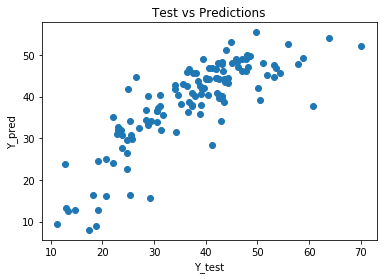

In [21]:
plt.scatter(y_test, y_pred)
plt.xlabel('Y_test')
plt.ylabel('Y_pred')
plt.title('Test vs Predictions')
plt.show()

### Evaluation Metrics

In [23]:
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

print(f'The MAE is {MAE}')
print(f'The MSE is {MSE}')
print(f'The RMSE is {RMSE}')

The MAE is 5.373024532571488
The MSE is 45.880307428750115
The RMSE is 6.773500382280207


In [24]:
metrics_eval = pd.DataFrame([MAE, MSE, RMSE], index=['MAE', 'MSE', 'RMSE'], columns= ['Metrics'])

### Plot the residual

Text(0.5, 1.0, 'Residual Plot')

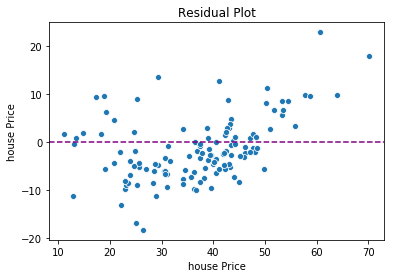

In [25]:
test_residual = y_test - y_pred

# Plot the residual (i.e. the error)

sns.scatterplot(y_test, test_residual)
plt.axhline(y=0, c='purple', ls='--')
plt.title('Residual Plot')

In [26]:
Average_Price = y_pred.mean()
Average_Price

38.352946384694576

To better improve our model prediction we introduce the polynomial regression features, this helps to prevent overfitting of our model.

### Polynomial Features

In [27]:
# Import the polynomial library from Scikit learn 
from sklearn.preprocessing import PolynomialFeatures

**Note:** The best degree for a model has 2 degree, for model with higher degree if second order is used the model will overfit. We can increase the degree to 3 then regularize, the regulization handles the overfitting.

In [28]:
polynomial_converter  = PolynomialFeatures(degree=3, include_bias=False)

# Fit the polynomial Features
poly_features = polynomial_converter.fit_transform(X)

# Check the shape of data and the transformed data

df.shape, poly_features.shape

((414, 8), (414, 119))

### Train, Test, Split using the Poly Features

In [29]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state= 101)

In [30]:
### Scaling the data
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [31]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Regularization using (Ridge, Lasso, ElasticNet`)

**Ridge Regression**

In [32]:
# import the labraries
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

In [33]:
ridge_model = Ridge(alpha=10)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)


In [34]:
# Evalaute the model

MAE_ridge = mean_absolute_error(y_test, y_pred_ridge)
MSE_ridge = mean_squared_error(y_test, y_pred_ridge)
RMSE_ridge = np.sqrt(MSE_ridge)

In [35]:
metrics_eval_ridge = pd.DataFrame([MAE_ridge, MSE_ridge, RMSE_ridge], index=['MAE_ridge', 'MSE_ridge', 'RMSE_ridge'], columns= ['Metrics'])
metrics_eval_ridge

,Metrics
MAE_ridge,4.276238
MSE_ridge,30.114324
RMSE_ridge,5.487652


Let's choose the alpha value using **Cross Validation**

In [36]:
ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 50.0), scoring='neg_mean_absolute_error')
ridge_cv_model.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1,  1. , 50. ]), cv=None, fit_intercept=True,
    gcv_mode=None, normalize=False, scoring='neg_mean_absolute_error',
    store_cv_values=False)

In [37]:
y_pred_RCV = ridge_cv_model.predict(X_test)

In [38]:
MAE_RCV = mean_absolute_error(y_test, y_pred_RCV)
MSE_RCV = mean_squared_error(y_test, y_pred_RCV)
RMSE_RCV = np.sqrt(MSE_RCV)

In [39]:
metric_eval_RCV = pd.DataFrame([MAE_RCV, MSE_RCV, RMSE_RCV], index=['MAE_RCV', 'MSE_RCV', 'RMSE_RCV'], columns= ['Metrics'])
metric_eval_RCV

,Metrics
MAE_RCV,4.424648
MSE_RCV,30.160146
RMSE_RCV,5.491825


### Lasso Regression`

In [40]:
from sklearn.linear_model import LassoCV
lasso_cv_model = LassoCV(eps=0.1, n_alphas= 100, cv=10)

lasso_cv_model.fit(X_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.1, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [41]:
# Let's the see the optimal value of alpha

print(f' The optimal value of alpha: {lasso_cv_model.alpha_}')

 The optimal value of alpha: 0.9459471369494195


In [42]:
y_pred_lasso = lasso_cv_model.predict(X_test)

In [43]:
MAE_lasso = mean_absolute_error(y_test, y_pred_lasso)
MSE_lasso = mean_squared_error(y_test, y_pred_lasso)
RMSE_lasso = np.sqrt(MSE_lasso)

In [44]:
metric_eval_lasso = pd.DataFrame([MAE_lasso, MSE_lasso, RMSE_lasso], index=['MAE_lasso', 'MSE_lasso', 'RMSE_lasso'], columns= ['Metrics'])
metric_eval_lasso

,Metrics
MAE_lasso,4.846298
MSE_lasso,38.710489
RMSE_lasso,6.221775


In [45]:
# Let's print the coefficient

lasso_cv_model.coef_

array([-0.        ,  0.        , -1.9156373 , -0.62272341,  3.45312665,
        0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
       -0.20679817, -0.99013757,  0.28751759,  1.07699056,  0.        ,
       -0.        , -0.        ,  0.        , -0.        , -0.10185946,
       -0.        , -2.04989073, -1.34370806, -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        , -0.05269117,
       -0.        , -0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        ,  0.        , -0.        ,
       -0.        ,  0.        ,  0.97000997,  0.        , -0.  

In [46]:
list_lasso_cv_model_coef = lasso_cv_model.coef_

count = 0
for i in list_lasso_cv_model_coef:
    if i != 0:
        count += 1
print('There are', count , 'none-zero coefficient')

There are 16 none-zero coefficient


### Elastic Net

In [47]:
# import the library
from sklearn.linear_model import ElasticNetCV

In [48]:
elastic_model = ElasticNetCV(l1_ratio = [0.1, 0.5, 0.7, 0.9, 0.95, 1.0], 
                           cv=10, max_iter =1000)

In [49]:
# Fit the model
elastic_model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
       l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1.0], max_iter=1000,
       n_alphas=100, n_jobs=None, normalize=False, positive=False,
       precompute='auto', random_state=None, selection='cyclic',
       tol=0.0001, verbose=0)

In [50]:
# Let's check the model ratio
elastic_model.l1_ratio_

0.9

In [51]:
# Predict the model
y_pred_elastic = elastic_model.predict(X_test)

In [52]:
# Metric Evalaution
MAE_Elastic= mean_absolute_error(y_test, y_pred_elastic)
MSE_Elastic= mean_squared_error(y_test, y_pred_elastic)
RMSE_Elastic= np.sqrt(MSE_Elastic)

In [53]:
metric_eval_elastic = pd.DataFrame([MAE_Elastic, MSE_Elastic, RMSE_Elastic], index=['MAE_elastic', 'MSE_elastic', 'RMSE_elastic'], columns=['Metrics'])
metric_eval_elastic

,Metrics
MAE_elastic,4.443193
MSE_elastic,30.532526
RMSE_elastic,5.525625


In [59]:
metrics_table = [metrics_eval, metrics_eval_ridge, metric_eval_RCV, metric_eval_lasso, metric_eval_elastic]
pd.concat(metrics_table)

,Metrics
MAE,5.373025
MSE,45.880307
RMSE,6.773500
MAE_ridge,4.276238
MSE_ridge,30.114324
RMSE_ridge,5.487652
MAE_RCV,4.424648
MSE_RCV,30.160146
RMSE_RCV,5.491825
MAE_lasso,4.846298


### Result 

The evaluation result above shows that the Ridge Regression as the least error with the MAE = 4.27 and MSE = 30.11

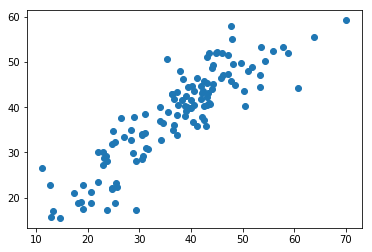

In [60]:
# Let's Chech plot its residual 
test_residual_ridge = y_test - y_pred_ridge

plt.scatter(y_test, y_pred_ridge)

Text(0.5, 1.0, 'Residual Plot')

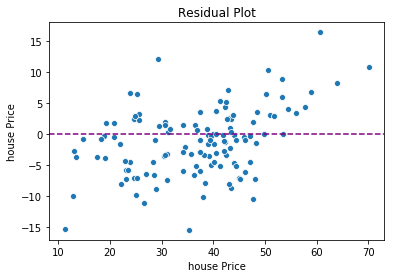

In [61]:
sns.scatterplot(y_test, test_residual_ridge)
plt.axhline(y=0, c='purple', ls='--')
plt.title('Residual Plot')

From the residual plot, we can see the points a randomly dispersed around the center, we can say our model predictions are correct.

In [62]:
Avg_house_price = y_pred_ridge.mean()
Avg_house_price

38.158907326040236

Predicted average house price of unit area 38.15